# https://colab.research.google.com/

# Apprendre à coder en Python pour l'Intelligence Artificielle
## Episode 3 - Construire un Test ADN

<p align="center">
<a href="https://youtu.be/8fCtWNnBNFc" target="_blank" ><img  src="https://github.com/anisayari/Youtube-apprendre-python-intelligence-artificielle/blob/master/%233%20-%201er%20Projet%20-%20Construire%20un%20Test%20ADN/cover-serie-3.png?raw=true" width="800" height="auto"/></a>
</p>

## Construction de notre population

In [0]:
!pip install dna_features_viewer

     |████████████████████████████████| 2.3MB 5.4MB/s 
  Created wheel for dna-features-viewer: filename=dna_features_viewer-3.0.1-cp36-none-any.whl size=30517 sha256=97537268acb700417540cc60e409411e2690b2aed4cbe0a14d58f93d3a6a4579
  Stored in directory: /root/.cache/pip/wheels/48/83/d1/8f63b154abe085e3c258d0cecf7b0fc20e66d24d5b1a7f7251
Successfully built dna-features-viewer


genes1 TGCA 1 5
genes2 CATGCA 3 9
genes3 GCATG 10 15
genes4 TGCATG 13 19
genes5 TGCATGC 17 24
genes6 TGCATGCATG 25 35
genes7 GCATGCAT 34 42
genes8 CATGCATGCATGCATGCATGCATGCATGCA 27 57
genes9 GCATGC 54 60
genes10 ATGCGTGGTG 60 70


In [0]:
#gene[28:34] = 'GCATGC'
#gene[56:62]= 'TGCATG'
genes= 'TACCAACACGCGTTAGGTGGCACGTTGCGAAGCTGCTTGACGGCCTTATGGCCCGGTGGTAGGGTCCTG'
print(genes,len(genes))
start = 11
end = 41
genes = genes[:start] + 'CATGCATGCATGCATGCATGCATGCATGCA' + genes[end:]

start = 52
end = 58
genes_tmp = genes[:start] + 'CATGCA' + genes[end:]
print(genes_tmp,len(genes_tmp))

TACCAACACGCGTTAGGTGGCACGTTGCGAAGCTGCTTGACGGCCTTATGGCCCGGTGGTAGGGTCCTG 69
TACCAACACGCCATGCATGCATGCATGCATGCATGCATGCAGGCCTTATGGCCATGCAGTAGGGTCCTG 69


In [0]:
genes3 = { 'sequence':"ATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCGTGGTGGATT",
    'genes': {
            'genes1':(1,5),
            'genes2':(3,9),
            'genes3':(10,15),
            'genes4':(13,19),
            'genes5':(17,24),
            'genes6':(25,35),
            'genes7':(34,42),
            'genes8':(27,57),
            'genes9':(54,60),
            'genes10':(60,70)
          }
}

/usr/local/lib/python3.6/dist-packages/Bio/Seq.py:2859: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


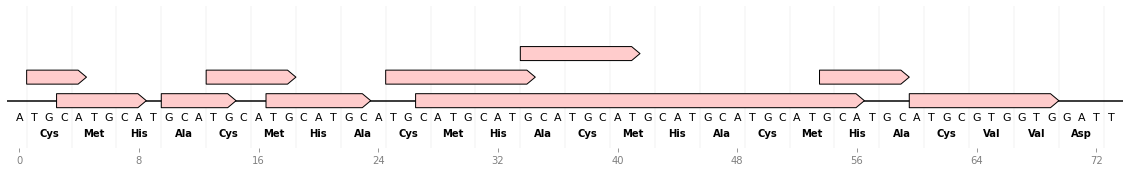

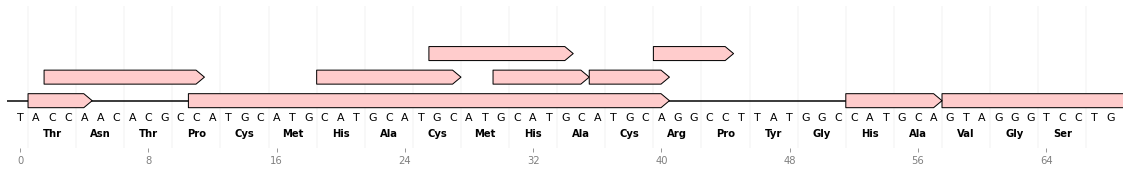

In [0]:
from dna_features_viewer import GraphicFeature, GraphicRecord

def print_sequence_dna(genes):
  sequence_gene = genes['sequence']
  
  features_gene = []
  for gene_ in genes['genes'].values():
    features_gene.append(GraphicFeature(start=gene_[0], end=gene_[1], strand=+1, color='#ffcccc'))

  record = GraphicRecord(sequence=sequence_gene, features=features_gene)

  ax, _ = record.plot(figure_width=20)
  record.plot_sequence(ax)
  record.plot_translation(ax, (1, len(sequence_gene)), fontdict={'weight': 'bold'})
  

genes1 = { 'sequence':"ATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCGTGGTGGATT",
    'genes': {
            'genes1':(1,5),
            'genes2':(3,9),
            'genes3':(10,15),
            'genes4':(13,19),
            'genes5':(17,24),
            'genes6':(25,35),
            'genes7':(34,42),
            'genes8':(27,57),
            'genes9':(54,60),
            'genes10':(60,70)
          }
}


genes2 = { 'sequence':"TACCAACACGCCATGCATGCATGCATGCATGCATGCATGCAGGCCTTATGGCCATGCAGTAGGGTCCTG",
    'genes': {
            'genes1':(1,5),
            'genes2':(2,12),
            'genes3':(11,41),
            'genes4':(19,28),
            'genes5':(26,35),
            'genes6':(30,36),
            'genes7':(36,41),
            'genes8':(40,45),
            'genes9':(52,58),
            'genes10':(58,70)
          }
}

print_sequence_dna(genes1)
print_sequence_dna(genes2)


## Construction de notre logique de Test

# UTILS

In [0]:
genes = { 'sequence':"ATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGC",
    'genes': {
            'genes1':(1,5),
            'genes2':(3,9),
            'genes3':(10,25),
            'genes4':(20,28)
          }
}

for gene_ in genes['genes'].values():
  print(gene_[0],gene_[1])

1 5
3 9
10 25
20 28


In [0]:
genes1 = { 'sequence':"ATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCGTGGTGGATT",
    'genes': {
            'genes1':(0,5),
            'genes2':(3,9),
            'genes3':(10,15),
            'genes4':(13,19),
            'genes5':(17,24),
            'genes6':(25,35),
            'genes7':(34,42),
            'genes8':(27,57),
            'genes9':(54,60),
            'genes10':(60,70)
          }
}
seq = genes1['sequence']
for gene_ in genes['genes']:
  print(gene_,seq[genes['genes'][gene_][0]:genes['genes'][gene_][1]],genes['genes'][gene_][0],genes['genes'][gene_][1])
    

{(1, 5)}
{(3, 9)}
{(10, 25)}
{(20, 28)}


[None, None, None, None]